# Global Development Trends (2000-2025)

## Step 1: Import Libraries & Load Data

In [35]:
# import libraies 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import join

In [36]:
# create path

path = r'../Data_Extract_From_World_Development_Indicators/Data'

In [37]:
# load data 

df_clean = pd.read_csv('Clean_Data.csv')

In [38]:
# check data info

print(f"Shape: {df_clean.shape}")
df_clean.head()

Shape: (4737, 9)


,Country Name,Country Code,Year,GDP per capita (current US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)",GDP_growth,LE_change,Internet_growth
0,Afghanistan,AFG,2000,174.930991,NaN,55.005,NaN,NaN,NaN
1,Afghanistan,AFG,2001,138.706822,0.00472,55.511,-20.707691,0.506,NaN
2,Afghanistan,AFG,2002,178.954088,0.00456,56.225,29.016069,0.714,-3.389831
3,Afghanistan,AFG,2003,198.871116,0.08790,57.171,11.129686,0.946,1827.631579
4,Afghanistan,AFG,2004,221.763654,0.10600,57.810,11.511243,0.639,20.591581


## Step 2: Select Relevant Variables and Data Cleaning

In [39]:
# drop non-numeric / ID columns

numeric_df = df_clean.select_dtypes(include=[np.number])

In [40]:
# keep track of categorical for later

categorical_cols = ["Country Name", "Country Code", "Year"]

In [41]:
numeric_df.head()

,Year,GDP per capita (current US$),Individuals using the Internet (% of population),"Life expectancy at birth, total (years)",GDP_growth,LE_change,Internet_growth
0,2000,174.930991,NaN,55.005,NaN,NaN,NaN
1,2001,138.706822,0.00472,55.511,-20.707691,0.506,NaN
2,2002,178.954088,0.00456,56.225,29.016069,0.714,-3.389831
3,2003,198.871116,0.08790,57.171,11.129686,0.946,1827.631579
4,2004,221.763654,0.10600,57.810,11.511243,0.639,20.591581


## Step 3: Correlation Matrix Heatmap

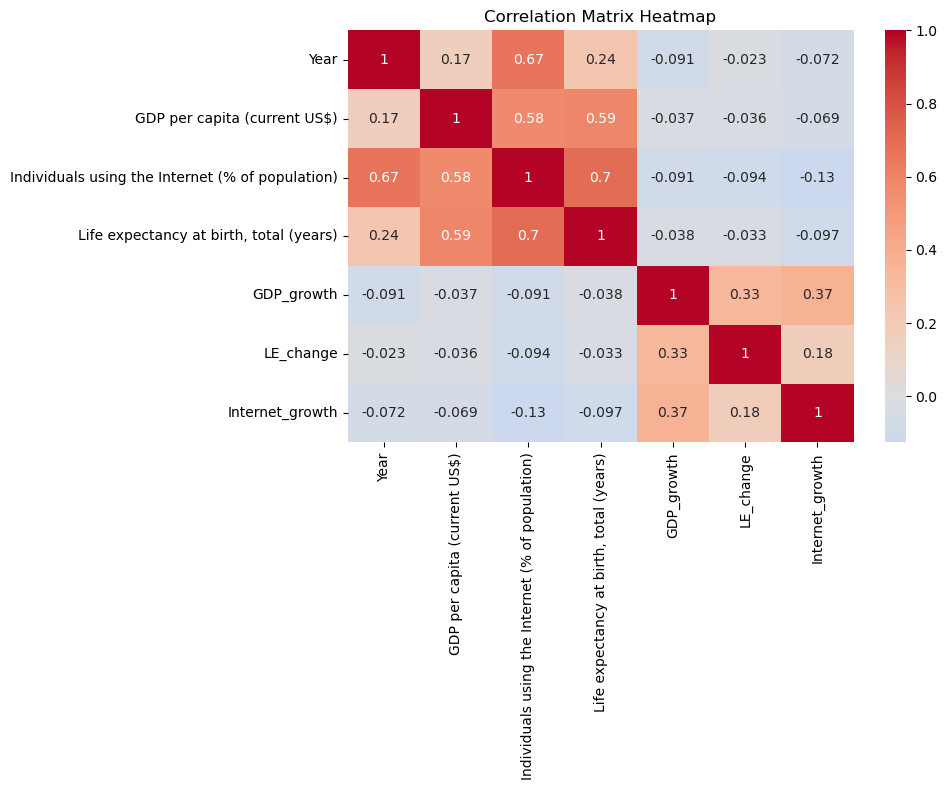

In [42]:
# correlation heatmap

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.savefig("Correlation Matrix Heatmap.png")
plt.show()



**Interpretation:**  
- Darker colors indicate stronger correlations.  
- Positive values --> indicators move together.  
- Negative values --> inverse relationship.  
- This helps spot relationships (e.g., higher GDP might link to higher internet use or life expectancy).  


## Step 4: Scatterplots for Strogest Correlations

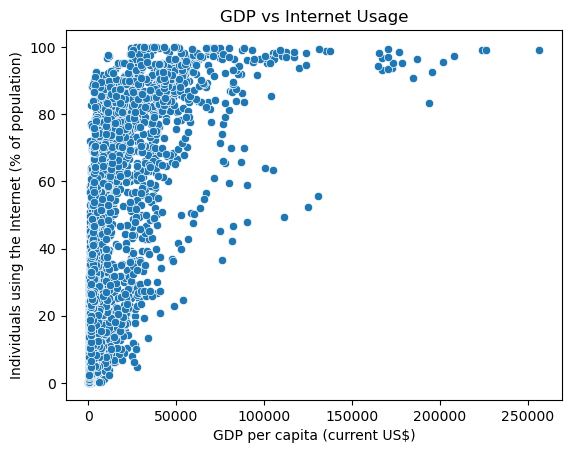

In [43]:
# GDP vs Internet Use


sns.scatterplot(data=df_clean, x="GDP per capita (current US$)", y="Individuals using the Internet (% of population)")
plt.title("GDP vs Internet Usage")
plt.savefig("GDP vs Internet Usage.png")
plt.show()


**Interpretation:**  
- Expect an upward trend: wealthier countries typically show higher internet adoption.  
- Outliers may reveal countries with high GDP but low digital adoption or vice versa.  


## Stepb 5: Pair Plot

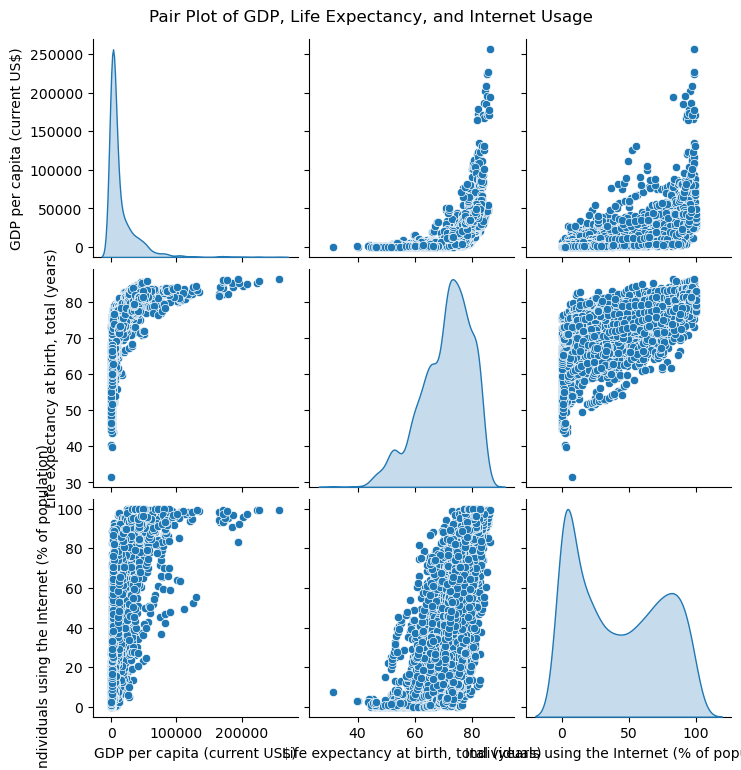

In [44]:
# Pair plot of selected project variables

sns.pairplot(
    numeric_df[[
        "GDP per capita (current US$)", 
        "Life expectancy at birth, total (years)",  
        "Individuals using the Internet (% of population)"
    ]].dropna(),
  diag_kind="kde")
plt.suptitle("Pair Plot of GDP, Life Expectancy, and Internet Usage", y=1.02)
plt.savefig("Pair Plot of GDP, Life Expectancy, and Internet Usage.png")
plt.show()


**Pair Plot Interpretation:**  

**Distributions (diagonal plots):**  
  * GDP per capita* shows a highly skewed distribution, with a small group of countries far wealthier than the rest.  
  * Life expectancy* is more normally distributed and centered around 65–75 years with fewer extreme values.  
  * Internet usage* shows a bimodal pattern, many countries still below 50%, but others close to 100%.  

**Relationships (off-diagonal scatterplots):**  
 * GDP per capita vs Life Expectancy: clear positive relationship though the effect tapers at high GDP (diminishing returns).  
 * GDP per capita vs Internet Usage: strong positive relationship but with some outliers like countries with high adoption despite lower GDP.  
 * Internet Usage vs Life Expectancy: moderate positive relationship and more connected countries tend to have better healthy outcomes.  

**Variables to Explore Further:**  
 * GDP per capita** -> because of its skewness and potential outliers with  few wealthy countries dominating.  
 * Internet usage** -> because of the large variation across countries and the possibility of “leapfrogging” that isnlow-income countries achieving high digital penetration.  
 * Life expectancy** -> because it shows convergence globally making it interesting to explore why health outcomes are more equal than income.  


## Step 6: Categorical plot

In [45]:
# drop aggregate groups like "High income", "World", etc.
aggregates = ["High income", "Low income", "Middle income", "World", 
              "Upper middle income", "Lower middle income", "OECD members"]

country_df = df_clean[~df_clean["Country Name"].isin(aggregates)]


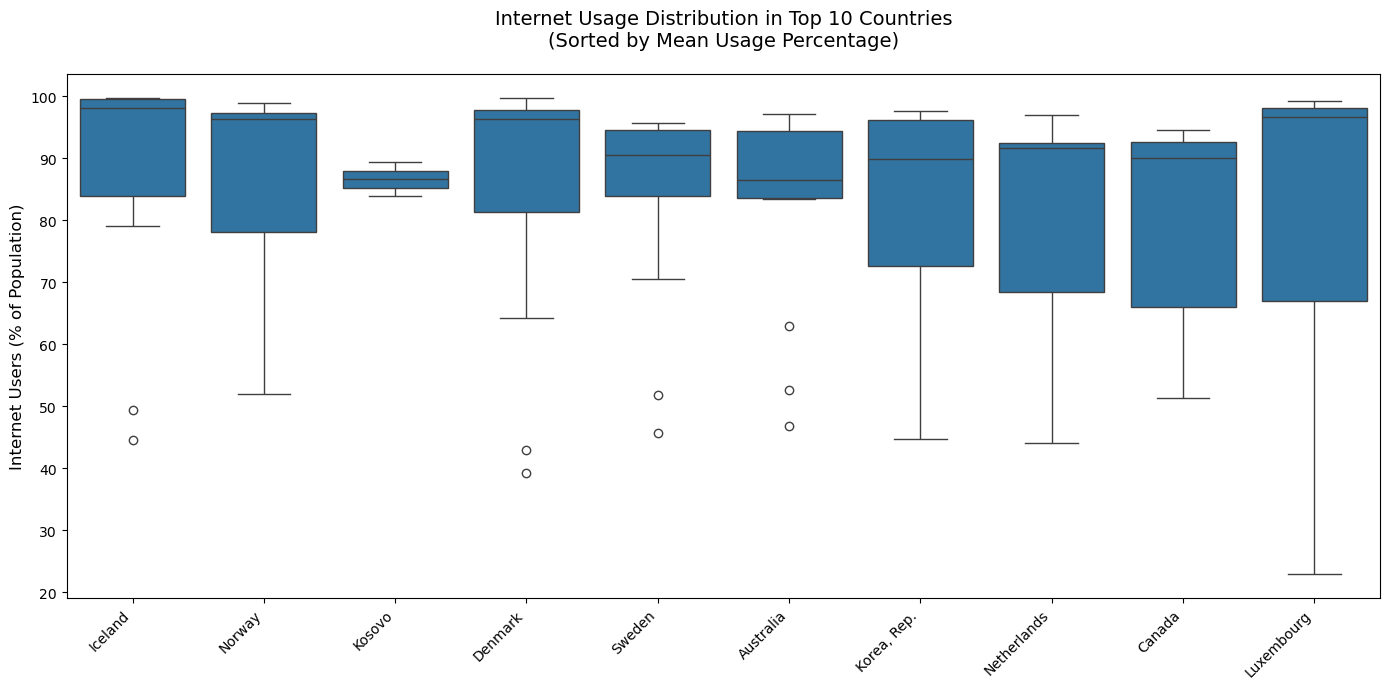

In [46]:
# Get top 10 countries with their mean values

top10_means = (
    country_df.groupby("Country Name")["Individuals using the Internet (% of population)"]
    .mean()
    .nlargest(10)
    .sort_values(ascending=False)  # Sort descending for better visualization
)

plt.figure(figsize=(14, 7))
sns.boxplot(data=country_df[country_df["Country Name"].isin(top10_means.index)],
            x="Country Name", 
            y="Individuals using the Internet (% of population)",
            order=top10_means.index)
plt.xticks(rotation=45, ha='right')
plt.title("Internet Usage Distribution in Top 10 Countries\n(Sorted by Mean Usage Percentage)", 
          fontsize=14, pad=20)
plt.ylabel("Internet Users (% of Population)", fontsize=12)
plt.xlabel("")
plt.tight_layout()
plt.savefig("top10_internet_usage_boxplot.png", dpi=300, bbox_inches='tight')
plt.show()

**Interpretation:**  
After removing aggregate groups (such as "High income" and "World") and focusing strictly on individual countries, the top 10 list now better reflects actual national patterns of internet adoption.  

 * These countries consistently show internet penetration rates close to 100%, reflecting advanced digital infrastructure and high connectivity.
 * The narrowing variation across these nations suggests that internet access has become nearly universal in the most developed economies.
 * In contrast, countries outside this top group are more heterogeneous, with wider gaps in adoption that highlight the digital divide between developed and developing regions.
 *  By excluding aggregates, i avoided double counting and  misrepresenting trends, since those groups already summarize multiple countries.
 *  This approach provides a cleaner and more realistic view on a national level of digital development.
 *  This plot helps identify leaders in technology adoption while hinting at inequalities in global internet accessibility.  


## Step 7:Research Questions & Early Insights

### Question 1: How has GDP per capita changed over time in selected countries?  
- GDP per capita shows an overall upward trend globally but the rate of increase varies strongly across countries.  
- Developed economies maintain steady growth, while some emerging economies show sharp increases after the year 2000.  

### Question 2: How has Life Expectancy evolved and does it correlate with economic growth?  
- Life expectancy has increased almost universally since 2000.  
- A strong positive correlation exists between GDP per capita and life expectancy  especially in high and middle income countries.  
- However, some lower income countries show improvements in life expectancy despite modest GDP growth, possibly due to targeted health interventions.  

### Question 3: How has Internet usage grown across countries and globally?  
- Internet usage has grown rapidly in all countries since the year 2000.  
- Developed countries approach near a universal adoption (>90%), while many developing countries still lag below 50%.  
- The digital division is evident in the categorical plots.
  
### Question 4: Are GDP growth, Life Expectancy change, and Internet adoption correlated?  
- Correlation matrix and scatterplots show all three are positively correlated.  
- The strongest link is between GDP per capita and Internet usage, followed by GDP and Life Expectancy.  
- Life expectancy and internet usage also correlate but more moderately.  

### Question 5: How do countries compare in terms of development and technology adoption trends?  
- Boxplots reveal stark differences, developed countries cluster tightly at high GDP, life expectancy and internet penetration, while developing countries display greater spread and lower averages.  
- This confirms persistent countries disparities in development outcomes.  


##  Additional Findings & New Questions  

### Extra Findings  
- **Skewness in GDP:** GDP per capita distribution is highly skewed , a small number of wealthy countries drive the global average upward.  
- **Convergence in Life Expectancy:** While GDP shows large disparities, life expectancy is converging globally and suggesting health improvements spread more evenly than economic gains.  
- **Leapfrogging in Internet Adoption:** Some middle income countries have achieved very high internet penetration despite not being among the wealthiest.  

### New Questions  
- Why do some countries achieve high life expectancy with relatively modest GDP levels?  
- Which countries are "outliers" in internet adoption.  e.g., low GDP but high digital penetration or vice versa?  
- Does faster internet adoption drive economic growth or does economic growth drive adoption?.  
- How did external shocks (like the COVID-19 pandemic in 2020) impact GDP, life expectancy and internet growth trends across countries?  


## step 8: Project Hypothesis

 
 **Hypothesis 1:** Countries with higher GDP per capita also tend to have higher life expectancy.  
   *Rationale:* Wealthier nations can invest more in healthcare, nutrition and infrastructure which improves longevity.  

 **Hypothesis 2:** Internet usage is positively correlated with GDP per capita.  
   *Rationale:* Digital infrastructure requires financial resources and richer populations are more likely to afford access.  

 **Hypothesis 3:** Internet usage is positively correlated with life expectancy.  
   *Rationale:* Increased digital connectivity facilitates access to health information, telemedicine, education and  indirectly supporting longer lives.  

 **Hypothesis 4:** Countries with rapid GDP growth also experience faster increases in internet adoption.  
   *Rationale:* Emerging economies often see digital technology adoption as both a driver and a result of growth.  

 **Hypothesis 5:** Regional disparities exist in development indicators (GDP, life expectancy, internet usage), with developed regions clustering at higher values compared to developing countries.  
   *Rationale:* This reflects the global digital divide and uneven economic development.  


In [47]:
# export data

numeric_df.to_csv('development_indicators.csv', index= False)